In [1]:
!pip install mlxtend --upgrade --no-deps
!pip uninstall pandas-profiling
!pip install pandas-profiling[notebook]
!pip install  xgboost
import six
import sys
sys.modules['sklearn.externals.six'] = six
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 29.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 31.8 MB/s 
     |████████████████████████████████| 102 kB 63.1 MB/s 
     |████████████████████████████████| 690 kB 53.0 MB/s 
     |████████████████████████████████| 9.8 MB 61.3 MB/s 
     |████████████████████████████████| 6

In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")

In [ ]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploratory Data Analysis (EDA)

1    165
0    138
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


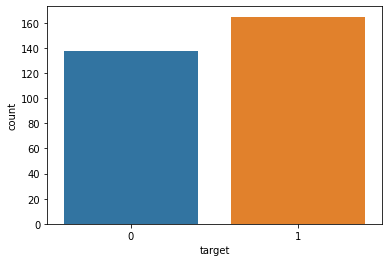

In [4]:
y = data["target"]
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [ ]:
data["sex"].unique()

array([1, 0])

96
207


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


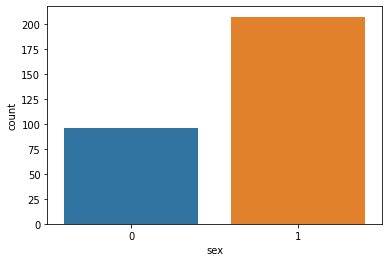

In [ ]:

ax = sns.countplot(data["sex"])
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1]);
print(countFemale)
print(countMale)

Here '0' means the number of female patients and '1' means the total number of male patients

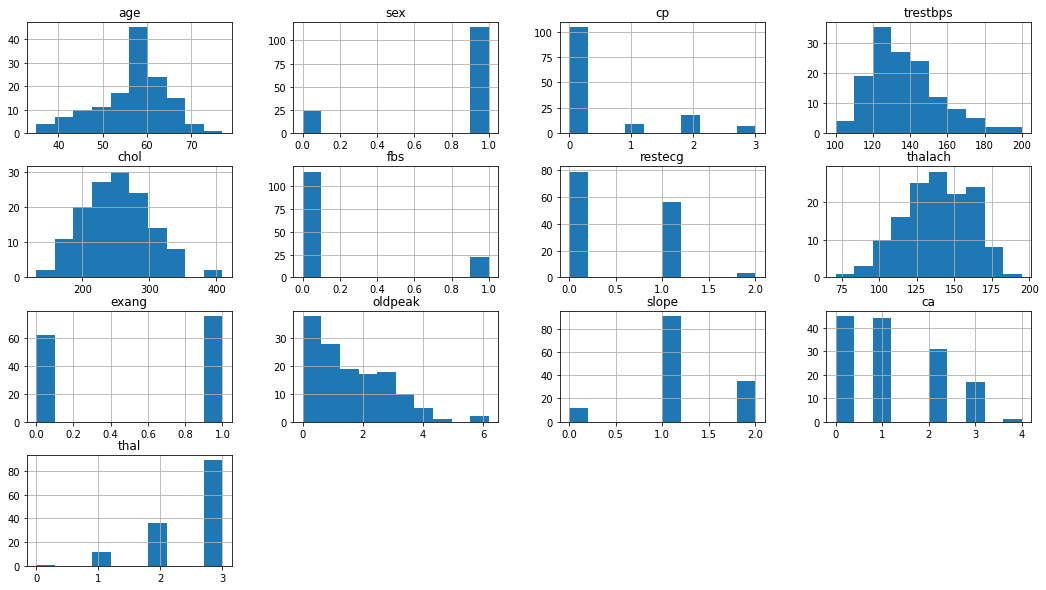

In [ ]:
df=data[data.target!=1]
df=df.drop('target',axis=1)
df.hist(figsize=(18,10))
plt.show()

In [ ]:
df=data[data.target!=0]

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


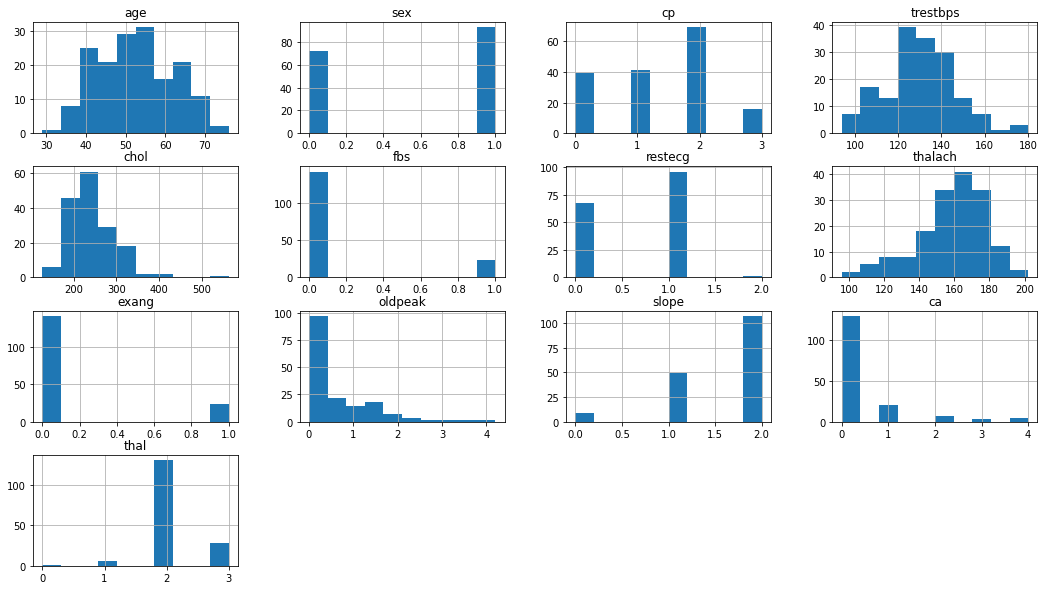

In [ ]:
df=df.drop('target',axis=1)
df.hist(figsize=(18,10))
plt.show()

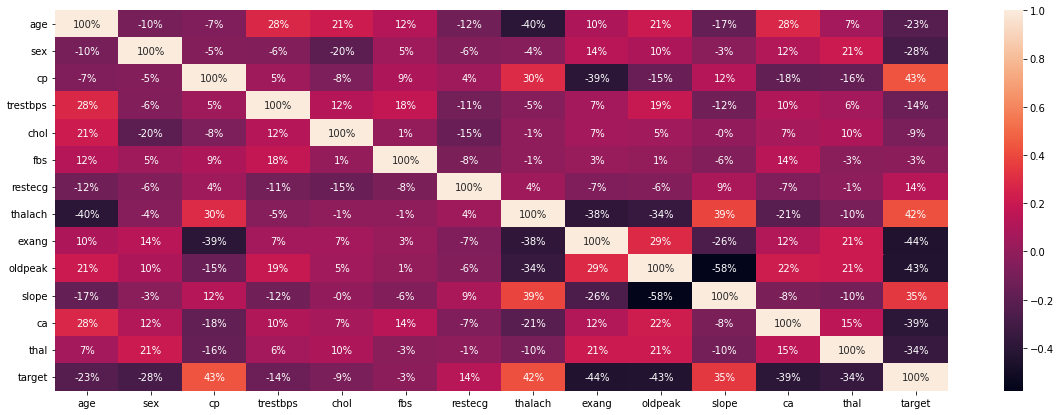

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,fmt='.0%')

After doing explorative data analysis I have obtained the correlation matrix which correlate the attributes of the data set.
It is obvious that one of the main triggers of heart disease is those variables, such as chests pain type (ca), thalium heart scan(thal), and slope.

In [ ]:
b=data.iloc[:,[0,1,2,7,10,13]]

<Figure size 1440x360 with 0 Axes>

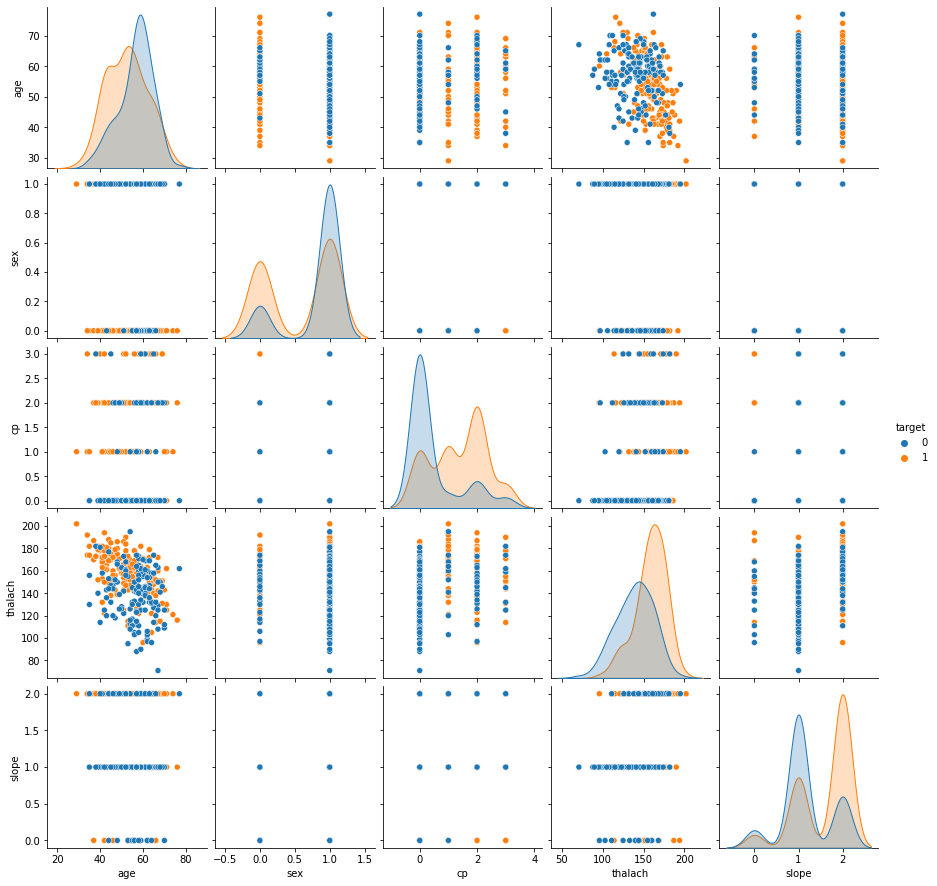

In [ ]:
plt.figure(figsize=(20,5))
sns.pairplot(data=b,hue='target')

Here '0' means the number of  patients without heart disease and represented by blue color and '1' means the total number of  patients with heart disease and represented by orange color. Pairplot shows how the features are related with each others to form the output results.

In [ ]:
pp.ProfileReport(data)

Output hidden; open in https://colab.research.google.com to view.

Heart Disease Frequency for ages

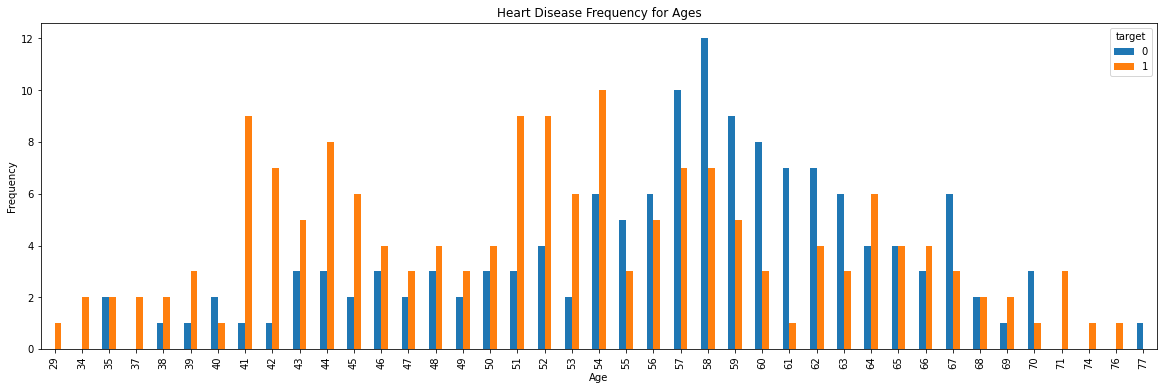

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

the likelihood of having cardiovascular diseases (CVDs) is not restricted to age alone [5]. This disease affects young people as well and is brought on by numerous different reasons.

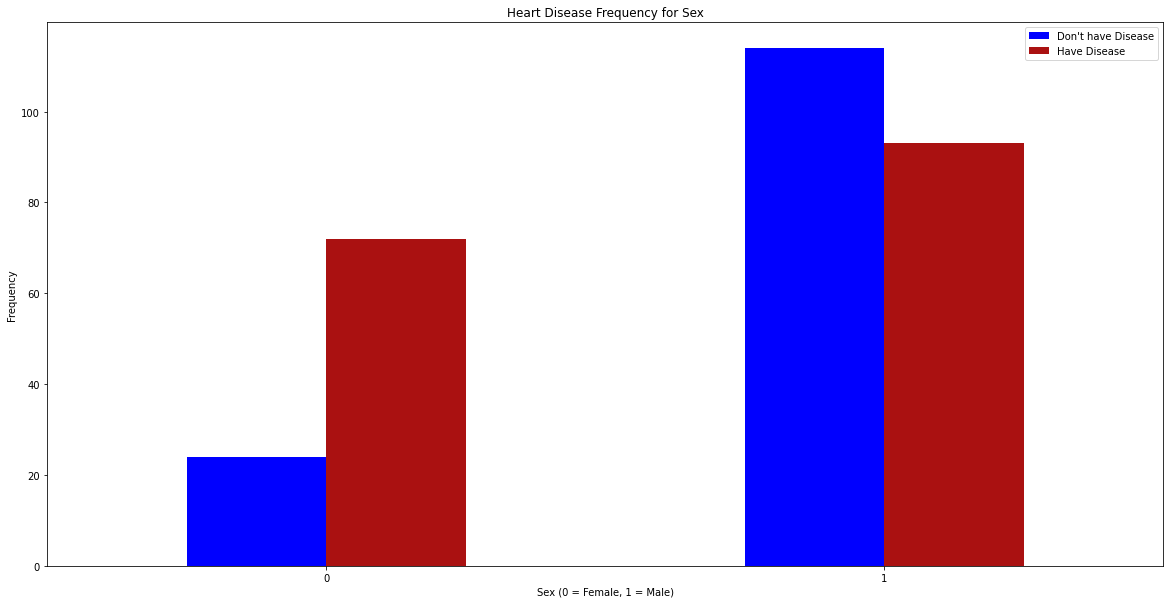

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

In [5]:
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

In [6]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [7]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [8]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[22  5]
 [ 4 30]]


Accuracy of Random Forest: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [9]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  3]
 [ 4 30]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [10]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [16]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [ ]:
import shap

In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='gbtree', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


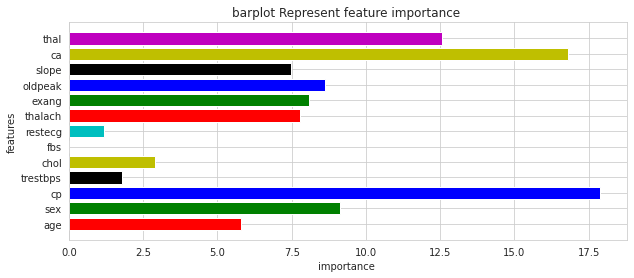

In [ ]:
explainer=shap.TreeExplainer(xgb)
shap_values=explainer.shap_values(X_test)
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_*100})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

In [ ]:
imp_feature

,Feature,Importance
0,age,5.806892
1,sex,9.111474
2,cp,17.891375
3,trestbps,1.788338
4,chol,2.913022
5,fbs,0.000000
6,restecg,1.163195
7,thalach,7.792663
8,exang,8.096207
9,oldpeak,8.606839


In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.02, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[25  2]
 [ 3 31]]


Accuracy of Extreme Gradient Boost: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



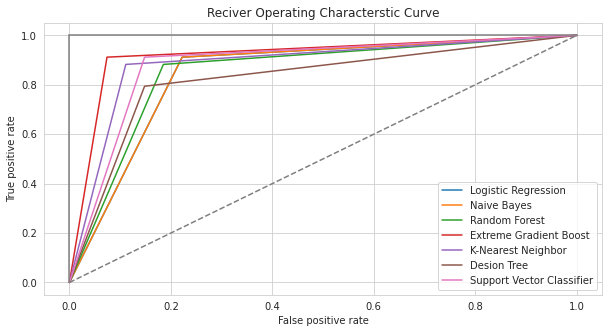

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
2,Random Forest,85.245902
3,Extreme Gradient Boost,91.803279
4,K-Nearest Neighbour,88.524590
5,Decision Tree,81.967213
6,Support Vector Machine,88.524590


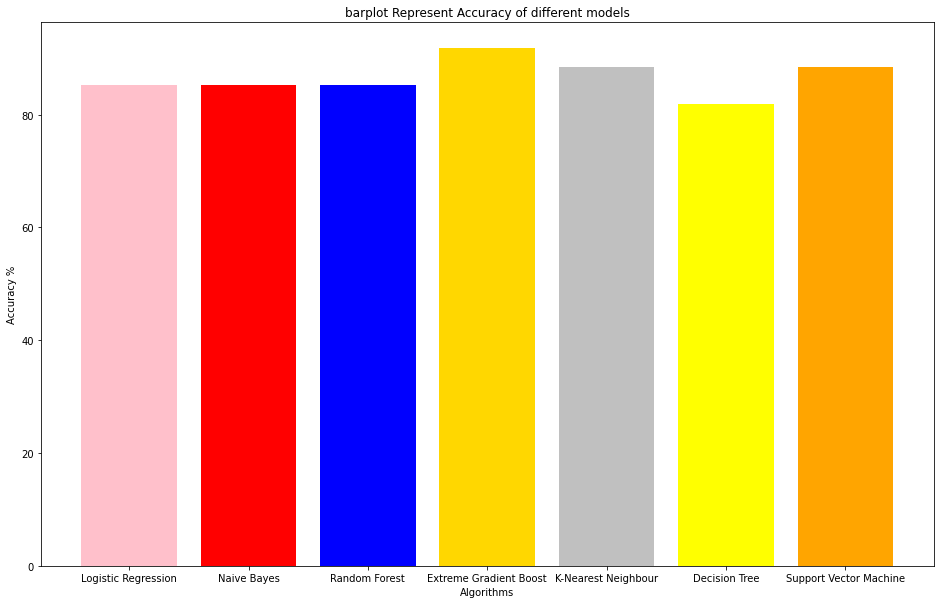

In [ ]:
colors = ['pink','red','blue','gold','silver','yellow','orange']
plt.figure(figsize=(16,10))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [ ]:
scv1=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier=svc,cv=4,random_state=42)
scv1.fit(X_train,y_train)
scv1_predicted = scv1.predict(X_test)
scv1_conf_matrix = confusion_matrix(y_test, scv1_predicted)
scv1_acc_score = accuracy_score(y_test, scv1_predicted)
print("confussion matrix")
print(scv1_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv1_acc_score*100,'\n')
print(classification_report(y_test,scv1_predicted))

confussion matrix
[[25  2]
 [ 2 32]]


Accuracy of StackingCVClassifier: 93.44262295081968 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine','StackingCVClassifier'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100,scv1_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
2,Random Forest,85.245902
3,Extreme Gradient Boost,91.803279
4,K-Nearest Neighbour,88.524590
5,Decision Tree,81.967213
6,Support Vector Machine,88.524590
7,StackingCVClassifier,93.442623


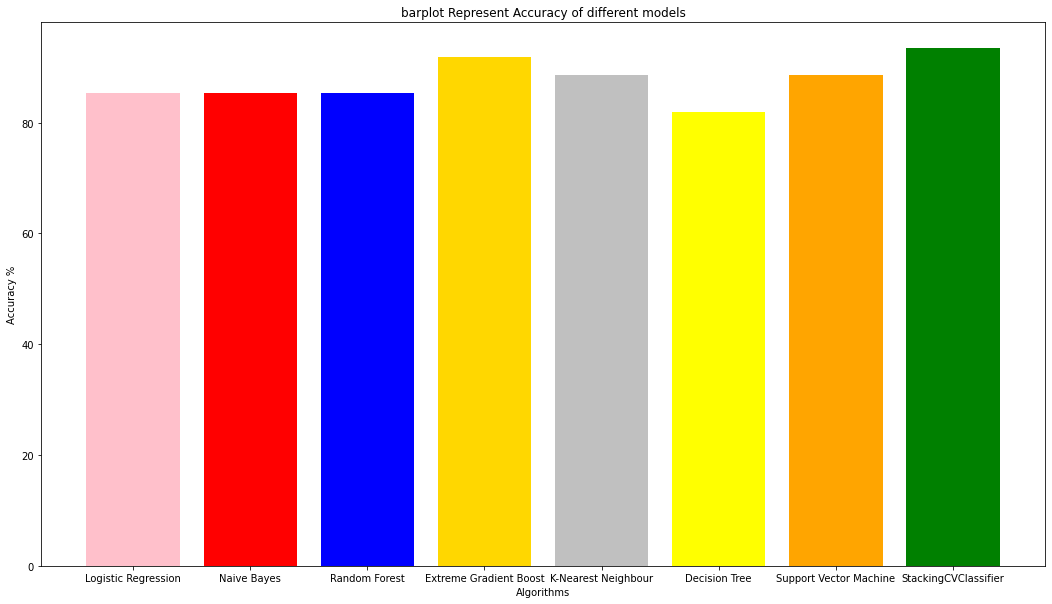

In [ ]:
colors = ['pink','red','blue','gold','silver','yellow','orange','green']
plt.figure(figsize=(18,10))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [ ]:
scv2=StackingCVClassifier(classifiers=[xgb,svc,lr],meta_classifier= svc,cv=4,random_state=42)
scv2.fit(X_train,y_train)
scv2_predicted = scv2.predict(X_test)
scv2_conf_matrix = confusion_matrix(y_test, scv2_predicted)
scv2_acc_score = accuracy_score(y_test, scv2_predicted)
print("confussion matrix")
print(scv2_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv2_acc_score*100,'\n')
print(classification_report(y_test,scv1_predicted))

confussion matrix
[[25  2]
 [ 3 31]]


Accuracy of StackingCVClassifier: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [ ]:
scv3=StackingCVClassifier(classifiers=[knn,svc,nb],meta_classifier= svc,cv=4,random_state=42)
scv3.fit(X_train,y_train)
scv3_predicted = scv3.predict(X_test)
scv3_conf_matrix = confusion_matrix(y_test, scv3_predicted)
scv3_acc_score = accuracy_score(y_test, scv3_predicted)
print("confussion matrix")
print(scv3_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv3_acc_score*100,'\n')
print(classification_report(y_test,scv3_predicted))

confussion matrix
[[20  7]
 [ 2 32]]


Accuracy of StackingCVClassifier: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
scv4=StackingCVClassifier(classifiers=[lr,nb,rf],meta_classifier= svc,cv=4,random_state=42)
scv4.fit(X_train,y_train)
scv4_predicted = scv4.predict(X_test)
scv4_conf_matrix = confusion_matrix(y_test, scv4_predicted)
scv4_acc_score = accuracy_score(y_test, scv4_predicted)

scv5=StackingCVClassifier(classifiers=[rf,svc,knn],meta_classifier= svc,cv=4,random_state=42)
scv5.fit(X_train,y_train)
scv5_predicted = scv5.predict(X_test)
scv5_conf_matrix = confusion_matrix(y_test, scv5_predicted)
scv5_acc_score = accuracy_score(y_test, scv5_predicted)


In [ ]:
model_ev = pd.DataFrame({'Model': ['lr,nb,rf','knn,svc,nb','rf,svc,knn','xgb,svc,lr','xgb,svc,knn'], 'Accuracy': [scv4_acc_score*100,
                    scv3_acc_score*100,scv5_acc_score*100,scv2_acc_score*100,scv1_acc_score*100]})
model_ev

,Model,Accuracy
0,"lr,nb,rf",80.327869
1,"knn,svc,nb",85.245902
2,"rf,svc,knn",88.524590
3,"xgb,svc,lr",91.803279
4,"xgb,svc,knn",93.442623


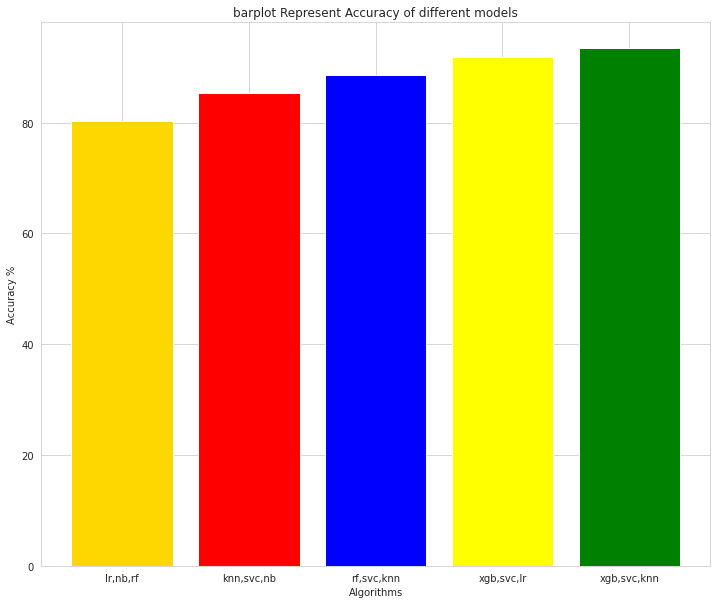

In [ ]:
colors = ['gold','red','blue','yellow','green']
plt.figure(figsize=(12,10))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [ ]:
scv_12=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=12,random_state=42)
scv_12.fit(X_train,y_train)
scv_12_predicted = scv_12.predict(X_test)
scv_12_conf_matrix = confusion_matrix(y_test, scv_12_predicted)
scv_12_acc_score = accuracy_score(y_test, scv_12_predicted)

scv_10=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=10,random_state=42)
scv_10.fit(X_train,y_train)
scv_10_predicted = scv_10.predict(X_test)
scv_10_conf_matrix = confusion_matrix(y_test, scv_10_predicted)
scv_10_acc_score = accuracy_score(y_test, scv_10_predicted)

scv_6=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=6,random_state=42)
scv_6.fit(X_train,y_train)
scv_6_predicted = scv_6.predict(X_test)
scv_6_conf_matrix = confusion_matrix(y_test, scv_6_predicted)
scv_6_acc_score = accuracy_score(y_test, scv_6_predicted)

scv_8=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=8,random_state=42)
scv_8.fit(X_train,y_train)
scv_8_predicted = scv_8.predict(X_test)
scv_8_conf_matrix = confusion_matrix(y_test, scv_8_predicted)
scv_8_acc_score = accuracy_score(y_test, scv_8_predicted)

scv_4=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=4,random_state=42)
scv_4.fit(X_train,y_train)
scv_4_predicted = scv_4.predict(X_test)
scv_4_conf_matrix = confusion_matrix(y_test, scv_4_predicted)
scv_4_acc_score = accuracy_score(y_test, scv_4_predicted)

scv_2=StackingCVClassifier(classifiers=[xgb,svc,knn],meta_classifier= svc,cv=2,random_state=42)
scv_2.fit(X_train,y_train)
scv_2_predicted = scv_2.predict(X_test)
scv_2_conf_matrix = confusion_matrix(y_test, scv_2_predicted)
scv_2_acc_score = accuracy_score(y_test, scv_2_predicted)


In [ ]:
model_ev = pd.DataFrame({'Model': ['cv=12','cv=10','cv=6','cv=8','cv=4','cv=2'], 'Accuracy': [scv_12_acc_score*100,scv_12_acc_score*100,
                    scv_8_acc_score*100,scv_6_acc_score*100,scv_4_acc_score*100,scv_2_acc_score*100]})
model_ev

,Model,Accuracy
0,cv=12,91.803279
1,cv=10,91.803279
2,cv=6,93.442623
3,cv=8,93.442623
4,cv=4,93.442623
5,cv=2,93.442623


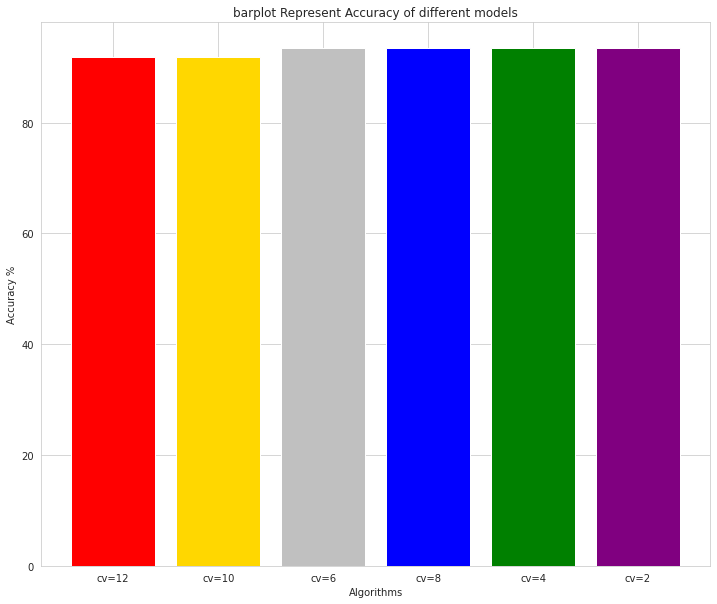

In [ ]:
colors = ['red','gold','silver','blue','green','purple']
plt.figure(figsize=(12,10))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Uses of Lime

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Split train and test set.
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE)

#Train random forest classification model
model = RandomForestClassifier(max_depth=15, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

# Diagnosis prediction
y_predict = model.predict(X_test)

# Probability of malignant tissue produced by the model
y_prob = [probs[1] for probs in model.predict_proba(X_test)]

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 28.4 MB/s 
     |████████████████████████████████| 133 kB 53.0 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=1829a20f1065a3e0a0dfe233faa5d03195ead083cfeabdec6b149a474c27e81c
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score
# Feature importance based on TRAINING set

perm_test = PermutationImportance(model, scoring=make_scorer(roc_auc_score),
                                   n_iter=50, random_state=RANDOM_STATE, cv="prefit")

# fit and see the permuation importances
perm_test.fit(X_train, y_train)

imp_df = eli5.explain_weights_df(perm_test)
label_df = pd.DataFrame({'feature': [ "x" + str(i) for i in range(len(X_test.columns))], 'feature_name': X_test.columns.values})
imp_df = pd.merge(label_df, imp_df, on='feature', how='inner', validate="one_to_one")
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='weight')
imp_range=range(1,len(imp_df.index)+1)

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 24.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=654c35fb16e1bc955144d0f238db5e9aec09677055670a619d08568726b251f9
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular
#Explain samples in test set

X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns.values,
                                                   discretize_continuous=True,
                                                   class_names=['No Heart Disese', 'Heart Disease'],
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=RANDOM_STATE)



In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3


Intercept 0.39268160755939124
Prediction_local [0.69640137]
Right: 0.72


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


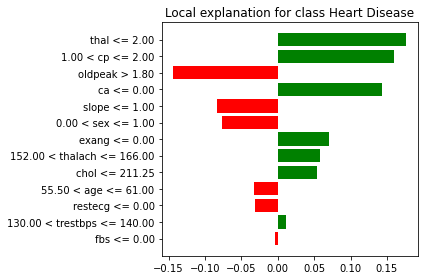

In [ ]:
#Explaining first subject in test set using all 13 features
exp = explainer.explain_instance(X_explain.values[3,:],model.predict_proba, 
                                 num_features=13)
#Plot local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()
exp.show_in_notebook(show_table=True)

Uses of Shap

In [ ]:
import shap
from shap import TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_explain)

In [ ]:
X_test.loc[202]

age          58.0
sex           1.0
cp            0.0
trestbps    150.0
chol        270.0
fbs           0.0
restecg       0.0
thalach     111.0
exang         1.0
oldpeak       0.8
slope         2.0
ca            0.0
thal          3.0
Name: 202, dtype: float64

In [ ]:
y_test[202]

0

In [ ]:
shap.initjs() #initialize javascript in cell
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_explain.iloc[0,:])

In [ ]:
#Interactive visualization of all sample/feature Shapley values
#It is possible to show the relative contribution of individual features for all
# samples on the y-axis as well.
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_explain)

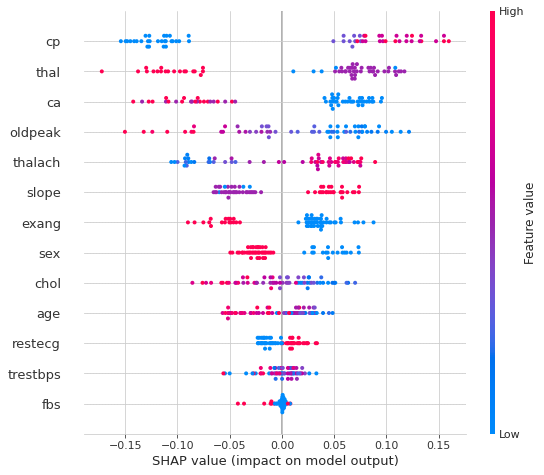

In [ ]:
#A summary plot with the shapley value (feature importance) 
shap.summary_plot(shap_values[1], X_explain)

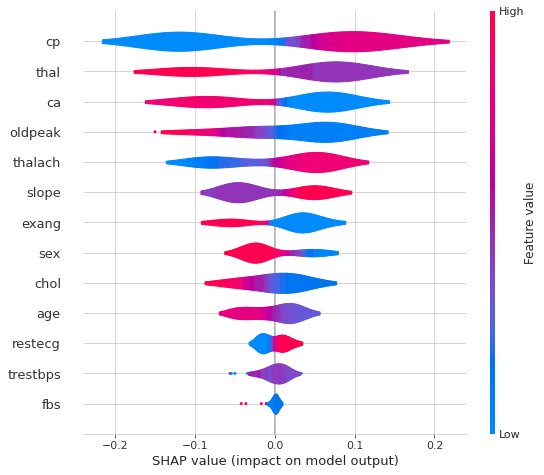

In [ ]:
#Same as above, but with violin plots to better see the distribution of shapley values 
shap.summary_plot(shap_values[1], X_explain, plot_type="violin")